This assignment is inspired by: 

- https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
- https://www.kaggle.com/code/dansbecker/xgboost/notebook

In this assignment we will apply XGBoost Regression techniques to predict house prices, based on the famous Kaggle Dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Step 1 is to download the dataset.

In [3]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import xgboost as xgb

#=========================================================================
# read in the data
#=========================================================================
train_data = pd.read_csv(r'C:\Career\LighthouseLabs\DataScience_Week9\Kaggle_XGBoost_Housing\train.csv',index_col=0)
test_data  = pd.read_csv(r'C:\Career\LighthouseLabs\DataScience_Week9\Kaggle_XGBoost_Housing\test.csv',index_col=0)

### <center style="background-color:Gainsboro; width:60%;">Feature selection</center>
The purpose of feature selection, as the name suggests, is to only model the most pertinent and important features, thus reducing the computational overhead, and also to alleviate the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). The following are a number of notebooks covering techniques to achieve said goal, all of which use the House Prices data as an example:

* [Feature selection using the Boruta-SHAP package](https://www.kaggle.com/carlmcbrideellis/feature-selection-using-the-boruta-shap-package)
* [Recursive Feature Elimination (RFE) example](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example)
* [House Prices: Permutation Importance example](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example)
* [Feature importance using the LASSO](https://www.kaggle.com/carlmcbrideellis/feature-importance-using-the-lasso)

In this assignment, we shall use all of the numerical columns, and ignore the categorical features. To encode the categorical features one can use for example [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 

Our first task is to do Feature Exploration and Selection. 

In [4]:
## Do your work here
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
train_data.shape

(1460, 80)

In [5]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']
X_test  = test_data.select_dtypes(include=['number']).copy()

In [6]:
# simple preprocessing: imputation; substitute any 'NaN' with mean value
#===========================================================================
X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_test.mean())

In [37]:
y_train.shape

(1460,)

In [7]:
# set up our regressor. Today we shall be using the random forest
#===========================================================================
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

In [8]:
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=1)

In [9]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 OverallQual
2 GrLivArea
3 TotalBsmtSF
4 BsmtFinSF1
5 2ndFlrSF
6 1stFlrSF
7 YearBuilt
8 LotArea
9 GarageCars
10 GarageArea
11 YearRemodAdd
12 LotFrontage
13 BsmtUnfSF
14 TotRmsAbvGrd
15 WoodDeckSF
16 OpenPorchSF
17 GarageYrBlt
18 MasVnrArea
19 OverallCond
20 MoSold
21 FullBath
22 Fireplaces
23 MSSubClass
24 BedroomAbvGr
25 ScreenPorch
26 YrSold
27 KitchenAbvGr
28 HalfBath
29 BsmtFinSF2
30 EnclosedPorch
31 BsmtFullBath
32 BsmtHalfBath
33 3SsnPorch
34 PoolArea
35 MiscVal
36 LowQualFinSF


In [10]:
# Choose the top 10 featues and use them for the model
#===========================================================================
n_features_to_select = 10
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=10)

In [11]:
# use the model to predict the prices for the test data
#===========================================================================
predictions = rfe.predict(X_test)

In [39]:
# write out CSV submission file
#===========================================================================
output = pd.DataFrame({"Id":test_data.index, 'SalePrice':predictions})
output.to_csv('submission.csv', index=False)

In [54]:
import os
import pandas as pd

# Specify the directory path where you want to save the file
output_dir = r'C:\Career\LighthouseLabs\DataScience_Week9\Kaggle_XGBoost_Housing'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the file path
file_path = os.path.join(output_dir, 'submission.csv')

# Write out CSV submission file
output.to_csv(file_path, index=False)

print("CSV file saved at:", file_path)


CSV file saved at: C:\Career\LighthouseLabs\DataScience_Week9\Kaggle_XGBoost_Housing\submission.csv


### <center style="background-color:Gainsboro; width:60%;">Feature engineering</center>
As mentioned, one aspect of feature engineering is the creation of new features out of existing features. A simple example would be to create a new feature which is the sum of the number of bathrooms in the house:

In [14]:
for df in (X_train, X_test):
    df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
    df["area_with_basement"]  = df["GrLivArea"] + df["TotalBsmtSF"]

Your next task is to apply some feature engineering to prepare for using the XGBoost Estimator to predict house prices.

In [15]:
# Sum floors' sqft into one Total
for df in (X_train, X_test):
    df['TotalSqFt'] = df['TotalBsmtSF'] + df['2ndFlrSF'] + df['1stFlrSF']

For more on this fascinating aspect may I recommend the free on-line book ["*Feature Engineering and Selection: A Practical Approach for Predictive Models*"](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson.
### <center style="background-color:Gainsboro; width:60%;">XGBoost estimator</center>
Note that for this competition we use the RMSLE evaluation metric, rather than the default metric, which for regression is the RMSE. For more on the peculiarities of the RMSLE see the Appendix below.

In [16]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

In [19]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']
X_test  = test_data.select_dtypes(include=['number']).copy()

Can you use grid search to find the optimal hyper parameters?

In [21]:
# GridSearch
X = X_train
y = y_train
# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5)

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(X, y)

# Get the best hyperparameters and the best logistic regression model
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

In [23]:
print("The best hyperparameters are ", grid_search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}


Now, can you setup a XGBoost Regressor object using your hyperparameters and fit it?

In [43]:
import xgboost as xgb

# Best hyperparameters from GridSearch
best_params = {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}

# Create the XGBoost Regressor object with the best hyperparameters
xgb_regressor = xgb.XGBRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators']
)

# Fit the XGBoost Regressor on the training data
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Finally, can you run it on your test set?

In [25]:
# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test)

In [46]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']
X_test  = test_data.select_dtypes(include=['number']).copy()

In [47]:
# simple preprocessing: imputation; substitute any 'NaN' with mean value
#===========================================================================
X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_test.mean())

In [48]:
for df in (X_train, X_test):
    df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
    df["area_with_basement"]  = df["GrLivArea"] + df["TotalBsmtSF"]

In [49]:
# Sum floors' sqft into one Total
for df in (X_train, X_test):
    df['TotalSqFt'] = df['TotalBsmtSF'] + df['2ndFlrSF'] + df['1stFlrSF']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
# Assuming you have imported the training data as train_data and prepared your target variable as y_train
# and you have already trained the model and made predictions

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model on the training set
rfe.fit(X_train_split, y_train_split)

# Make predictions on the validation set
predictions_val = rfe.predict(X_val)

# Calculate RMSLE score on the validation set
RMSLE_val = np.sqrt(mean_squared_log_error(y_val, predictions_val))
print("The validation score is %.5f" % RMSLE_val)

The validation score is 0.16290


In [ ]:
Can you score your solution offline and see how it does?

In [40]:
# For VALIDATION set
# Make predictions on the validation set
y_val_pred = xgb_regressor.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# rmse = mean_squared_error(y, y_pred, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse)

# y_test = test_data['SalePrice']
# For VALIDATION set
# # Make predictions on the validation set
# y_val_pred = xgb_regressor.predict(X_val)

# # Compute Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_val, y_val_pred)
# print("Mean Absolute Error (MAE):", mae)

# # Compute Root Mean Squared Error (RMSE)
# rmse = mean_squared_error(y_val, y_val_pred, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse)
# For VALIDATION set
# # Make predictions on the validation set
# y_val_pred = xgb_regressor.predict(X_val)

# # Compute Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_val, y_val_pred)
# print("Mean Absolute Error (MAE):", mae)

# # Compute Root Mean Squared Error (RMSE)
# rmse = mean_squared_error(y_val, y_val_pred, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
# Assuming you have imported the training data as train_data and prepared your target variable as y_train
# and you have already trained the model and made predictions

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model on the training set
rfe.fit(X_train_split, y_train_split)

# Make predictions on the validation set
predictions_val = rfe.predict(X_val)

# Calculate RMSLE score on the validation set
RMSLE_val = np.sqrt(mean_squared_log_error(y_val, predictions_val))
print("The validation score is %.5f" % RMSLE_val)

The validation score is 0.16285


In [56]:
# read in the ground truth file
solution   = pd.read_csv(r'C:\Career\LighthouseLabs\DataScience_Week9\Kaggle_XGBoost_Housing')
y_true     = solution["SalePrice"]

from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_true, predictions) )
print("The score is %.5f" % RMSLE )

PermissionError: [Errno 13] Permission denied: 'C:\\Career\\LighthouseLabs\\DataScience_Week9\\Kaggle_XGBoost_Housing'

Finally, use the below block to prepare your submission

In [ ]:
output = pd.DataFrame({"Id":test_data.index, "SalePrice":predictions})
output.to_csv('submission.csv', index=False)

### <center style="background-color:Gainsboro; width:60%;">Feature importance</center>
Let us also take a very quick look at the feature importance too:

NotFittedError: need to call fit or load_model beforehand

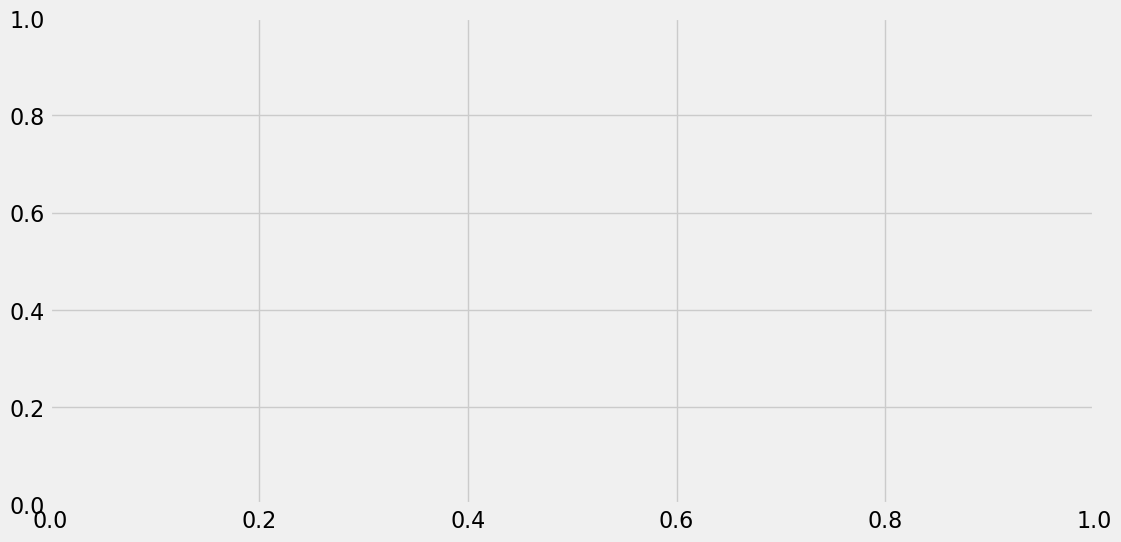

In [55]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

Where here the `F score` is a measure "*...based on the number of times a variable is selected for splitting, weighted by the squared improvement to the model as a result of each split, and averaged over all trees*." [1] 

Note that these importances are susceptible to small changes in the training data, and it is much better to make use of ["GPU accelerated SHAP values"](https://www.kaggle.com/carlmcbrideellis/gpu-accelerated-shap-values-jane-street-example), incorporated with version 1.3 of XGBoost.

Can you follow the above guide use SHAP values instead of F Score?

In [1]:
# code here

### <center style="background-color:Gainsboro; width:60%;">Appendix: The RMSLE evaluation metric</center>
From the competition [evaluation page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) we see that the metric we are using is the root mean squared logarithmic error (RMSLE), which is given by

$$ {\mathrm {RMSLE}}\,(y, \hat y) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $$

where $\hat{y}_i$ is the predicted value of the target for instance $i$, and $y_i$
is the actual value of the target for instance $i$.

It is important to note that, unlike the RMSE, the RMSLE is asymmetric; penalizing much more the underestimated predictions than the overestimated predictions. For example, say the correct value is $y_i = 1000$, then underestimating by 600 is almost twice as bad as overestimating by 600:

In [ ]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

print("The RMSLE score is %.3f" % RSLE( 400,1000) )
print("The RMSLE score is %.3f" % RSLE(1600,1000) )

The asymmetry arises because 

$$ \log (1 + \hat{y}_i) - \log (1 + y_i) =  \log \left( \frac{1 + \hat{y}_i}{1 + y_i} \right) $$

so we are essentially looking at ratios, rather than differences such as is the case of the RMSE. We can see the form that this asymmetry takes in the following plot, again using 1000 as our ground truth value:

In [ ]:
plt.rcParams["figure.figsize"] = (7, 4)
x = np.linspace(5,4000,100)
plt.plot(x, RSLE(x,1000))
plt.xlabel('prediction')
plt.ylabel('RMSLE')
plt.show()